线性和循环卷积

In [8]:
import numpy as np
# from numpy.fft import fft, ifft
from scipy.fft import fft, ifft
from matplotlib import pyplot as plt

In [9]:
x = np.array([2, 1, 2, 1])
y = np.array([1, 2, 3])

In [10]:
clin = np.convolve(x,y)
N = len(x) + len(y) -1
num = np.arange(1, N+1, 1)
print(num)
print(clin)

[1 2 3 4 5 6]
[ 2  5 10  8  8  3]


In [11]:
xzeropad = np.zeros(N - len(x))
yzeropad = np.zeros(N - len(y))
xpad = np.concatenate([x, xzeropad])
ypad = np.concatenate([y, yzeropad])
print(xpad)
print(ypad)

[2. 1. 2. 1. 0. 0.]
[1. 2. 3. 0. 0. 0.]


In [12]:
ccirc = ifft(fft(xpad)*fft(ypad))
print(ccirc)

[ 2.+0.j  5.+0.j 10.+0.j  8.+0.j  8.-0.j  3.+0.j]


In [13]:
xzeropads = np.zeros(12 - len(x))
yzeropads = np.zeros(12 - len(y))
xpads = np.concatenate([x, xzeropad])
ypads = np.concatenate([y, yzeropad])

ccircs = ifft(fft(xpad)*fft(ypad))
ccircs = ccircs[0:N]

<ipython-input-14-a486c4150023>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(311)
<ipython-input-14-a486c4150023>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(312)
/lib/python3.9/site-packages/matplotlib/collections.py:1402: ComplexWarning: Casting complex values to real discards the imaginary part
  seg = np.asarray(seg, float)
/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: Compl

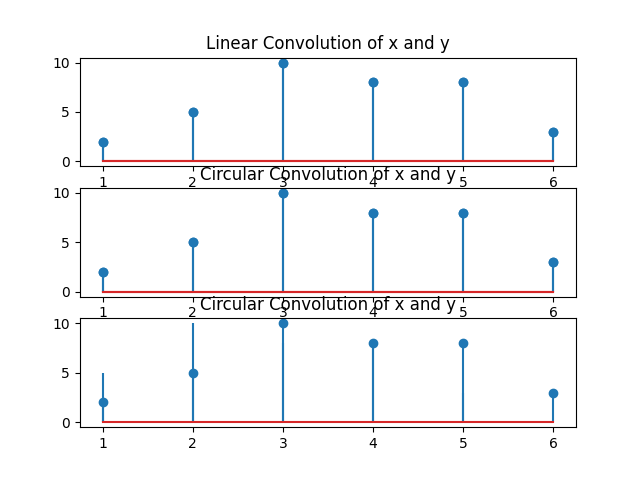

In [14]:
plt.subplot(311)
plt.stem(num, clin)
plt.title('Linear Convolution of x and y')

plt.subplot(312)
plt.stem(num, ccirc)
plt.title('Circular Convolution of x and y')

plt.subplot(313)
plt.stem(num, ccircs)
plt.title('Circular Convolution of x and y')

plt.show()